In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [82]:
df=pd.read_csv(r"C:\Users\71591\Desktop\dataset\diamonds.csv")
df.drop(columns= ['Unnamed: 0'], inplace= True)
# Display the DataFrame
df.head()  # Display the first few rows of the DataFrame


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [83]:
#get a summary of a DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [84]:
df_train,df_test=train_test_split(df,test_size=0.3,random_state=42)
df_train

,carat,cut,color,clarity,depth,table,price,x,y,z
19497,1.21,Ideal,H,VVS2,61.3,57.0,8131,6.92,6.87,4.23
31229,0.31,Ideal,E,VS2,62.0,56.0,756,4.38,4.36,2.71
22311,1.21,Ideal,E,VS1,62.4,57.0,10351,6.75,6.83,4.24
278,0.81,Ideal,F,SI2,62.6,55.0,2795,5.92,5.96,3.72
6646,0.79,Ideal,I,VVS2,61.7,56.0,4092,5.94,5.95,3.67
...,...,...,...,...,...,...,...,...,...,...
11284,1.05,Very Good,I,VS2,62.4,59.0,4975,6.48,6.51,4.05
44732,0.47,Ideal,D,VS1,61.0,55.0,1617,5.03,5.01,3.06
38158,0.33,Very Good,F,IF,60.3,58.0,1014,4.49,4.46,2.70
860,0.90,Premium,J,SI1,62.8,59.0,2871,6.13,6.03,3.82


In [85]:
# Check if there are any '?' in the entire DataFrame
has_question_marks_train = (df_train == '?').any().any()
print("Any '?' in df_train:", has_question_marks_train)

has_question_marks_test = (df_test == '?').any().any()
print("Any '?' in df_test:", has_question_marks_test)

Any '?' in df_train: False
Any '?' in df_test: False


In [86]:
# Check for NaN values in df_train
any_nan_train = df_train.isnull().values.any()
print(f"Any NaN values in df_train: {any_nan_train}")

# Check for NaN values in df_test
any_nan_test = df_test.isnull().values.any()
print(f"Any NaN values in df_test: {any_nan_test}")


Any NaN values in df_train: False
Any NaN values in df_test: False


In [87]:
#df_train.replace('?', np.nan, inplace=True)
#df_test.replace('?', np.nan, inplace=True)
df_train = df_train.drop_duplicates()
df_test = df_test.drop_duplicates()

In [88]:
df.dropna(inplace = True)
df_train.dropna(inplace = True)
df_test.dropna(inplace = True)

C:\Users\71591\AppData\Local\Temp\ipykernel_6164\3880960140.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.dropna(inplace = True)


In [89]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37687 entries, 19497 to 15795
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    37687 non-null  float64
 1   cut      37687 non-null  object 
 2   color    37687 non-null  object 
 3   clarity  37687 non-null  object 
 4   depth    37687 non-null  float64
 5   table    37687 non-null  float64
 6   price    37687 non-null  int64  
 7   x        37687 non-null  float64
 8   y        37687 non-null  float64
 9   z        37687 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 3.2+ MB


In [90]:
df_train.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

#Train df (Feature extraction )

In [91]:
#Carat
from sklearn.preprocessing import MinMaxScaler

# Initialize the scaler
scaler = MinMaxScaler()

# Fit and transform the 'carat' column
df_train['carat'] = scaler.fit_transform(df_train[['carat']])
df_train[['carat']]

C:\Users\71591\AppData\Local\Temp\ipykernel_6164\1261851785.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['carat'] = scaler.fit_transform(df_train[['carat']])


,carat
19497,0.209979
31229,0.022869
22311,0.209979
278,0.126819
6646,0.122661
...,...
11284,0.176715
44732,0.056133
38158,0.027027
860,0.145530


In [92]:
# One-hot encode the 'cut' column ,This will create new binary columns for each category in the cut column (except for the first one to avoid the dummy variable trap)
df_train = pd.get_dummies(df_train, columns=['cut'], drop_first=True)

In [93]:
# One-hot encode the 'color' column
df_train = pd.get_dummies(df_train, columns=['color'], drop_first=True)

# Check the updated columns
df_train.columns


Index(['carat', 'clarity', 'depth', 'table', 'price', 'x', 'y', 'z',
       'cut_Good', 'cut_Ideal', 'cut_Premium', 'cut_Very Good', 'color_E',
       'color_F', 'color_G', 'color_H', 'color_I', 'color_J'],
      dtype='object')

In [94]:
# One-hot encode the 'clarity' column
df_train = pd.get_dummies(df_train, columns=['clarity'], drop_first=True)

# Check the updated columns
df_train.columns

Index(['carat', 'depth', 'table', 'price', 'x', 'y', 'z', 'cut_Good',
       'cut_Ideal', 'cut_Premium', 'cut_Very Good', 'color_E', 'color_F',
       'color_G', 'color_H', 'color_I', 'color_J', 'clarity_IF', 'clarity_SI1',
       'clarity_SI2', 'clarity_VS1', 'clarity_VS2', 'clarity_VVS1',
       'clarity_VVS2'],
      dtype='object')

In [95]:
#depth

# Initialize the scaler
scaler = MinMaxScaler()

# Fit and transform the 'depth' column
df_train['depth'] = scaler.fit_transform(df_train[['depth']])


In [96]:
# Fit and transform the 'table' column (normalize)
df_train['table'] = scaler.fit_transform(df_train[['table']])


C:\Users\71591\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


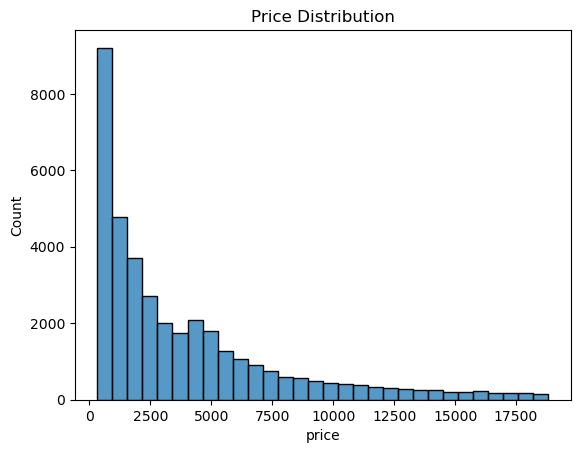

In [97]:
import seaborn as sns
# Check the distribution of price
sns.histplot(df_train['price'], bins=30)
plt.title('Price Distribution')
plt.show()


In [98]:
skewness = df_train['price'].skew()
print(f'Skewness of price: {skewness}') 

Skewness of price: 1.6091976617025217


In [99]:
#x,y,z,, Calculating the volume of a diamond (or any 3D object) helps quantify its size, which can be a useful feature in predicting its price. 
#The volume gives you a sense of how much material is present, which directly impacts the value.
# Calculate the volume
df_train['Volume'] = df_train['x'] * df_train['y'] * df_train['z']

# Calculate aspect ratios
df_train['ratio_x_y'] = df_train['x'] / df_train['y']
df_train['ratio_y_z'] = df_train['y'] / df_train['z']
df_train['ratio_x_z'] = df_train['x'] / df_train['z']

# Display the updated DataFrame with new features
df_train[['Volume', 'ratio_x_y', 'ratio_y_z', 'ratio_x_z']].head()


,Volume,ratio_x_y,ratio_y_z,ratio_x_z
19497,201.095892,1.007278,1.624113,1.635934
31229,51.752328,1.004587,1.608856,1.616236
22311,195.474600,0.988287,1.610849,1.591981
278,131.253504,0.993289,1.602151,1.591398
6646,129.708810,0.998319,1.621253,1.618529


In [100]:
####################
# Drop columns that are not needed for training
#df_train.drop(columns=['cut_Good', 'cut_Ideal', 'cut_Premium', 'cut_Very Good', 
                      # 'color_E', 'color_F', 'color_G', 'color_H', 'color_I', 'color_J', 
                       #'clarity_IF', 'clarity_SI1', 'clarity_SI2', 'clarity_VS1', 
                       #'clarity_VS2', 'clarity_VVS1', 'clarity_VVS2'], inplace=True)

# Display the updated DataFrame
#df_train.head()



In [101]:
# check for any remaining categorical columns. This will help you identify which columns still need to be processed or encoded before moving on to modeling.
df_train.select_dtypes(exclude = np.number).columns

Index(['cut_Good', 'cut_Ideal', 'cut_Premium', 'cut_Very Good', 'color_E',
       'color_F', 'color_G', 'color_H', 'color_I', 'color_J', 'clarity_IF',
       'clarity_SI1', 'clarity_SI2', 'clarity_VS1', 'clarity_VS2',
       'clarity_VVS1', 'clarity_VVS2'],
      dtype='object')

In [102]:
df_train.columns

Index(['carat', 'depth', 'table', 'price', 'x', 'y', 'z', 'cut_Good',
       'cut_Ideal', 'cut_Premium', 'cut_Very Good', 'color_E', 'color_F',
       'color_G', 'color_H', 'color_I', 'color_J', 'clarity_IF', 'clarity_SI1',
       'clarity_SI2', 'clarity_VS1', 'clarity_VS2', 'clarity_VVS1',
       'clarity_VVS2', 'Volume', 'ratio_x_y', 'ratio_y_z', 'ratio_x_z'],
      dtype='object')

C:\Users\71591\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\71591\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\71591\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\71591\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a fu

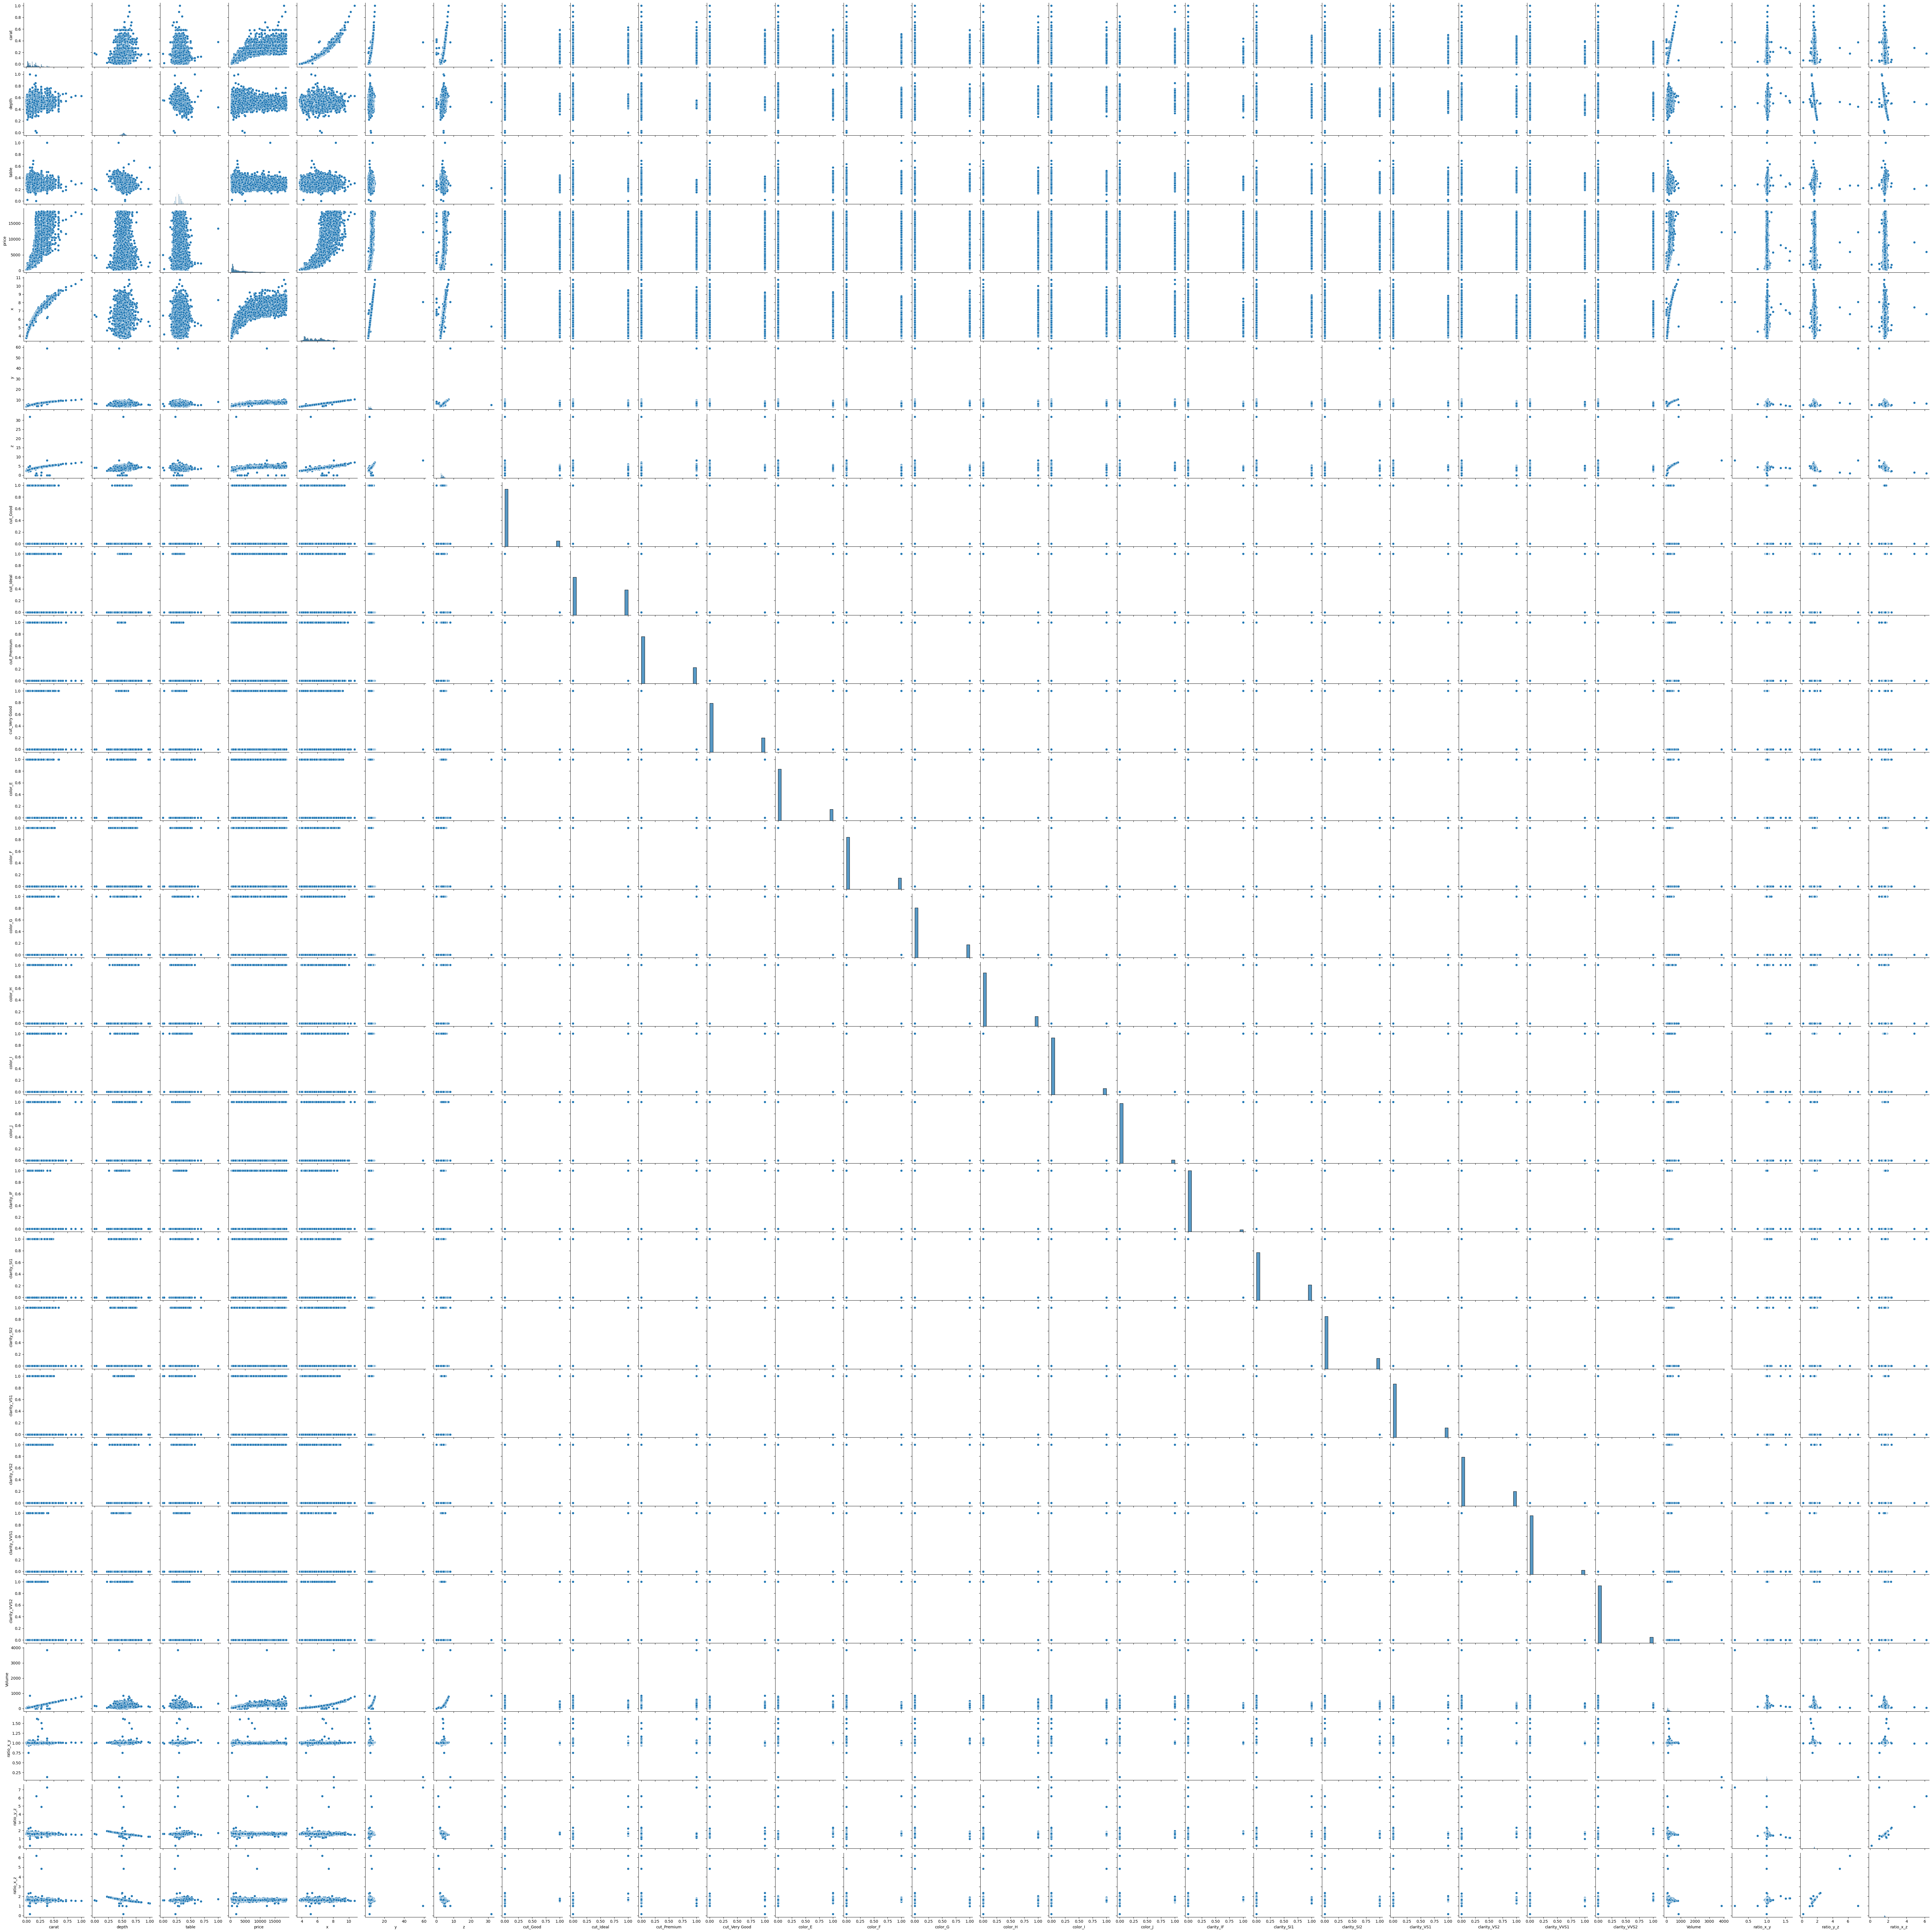

In [131]:
sns.pairplot(df_train)
plt.show()

#Test df (Feature extraction )

In [103]:
#test 'carat'
from sklearn.preprocessing import MinMaxScaler

# Initialize the scaler
scaler = MinMaxScaler()

# Fit and transform the 'carat' column
df_test['carat'] = scaler.fit_transform(df_test[['carat']])


In [104]:
# One-hot encode the 'cut' column
df_test = pd.get_dummies(df_test, columns=['cut'], drop_first=True)


In [105]:
# One-hot encode the 'color' column
df_test = pd.get_dummies(df_test, columns=['color'], drop_first=True)


In [106]:
# One-hot encode the 'clarity' column
df_test = pd.get_dummies(df_test, columns=['clarity'], drop_first=True)


In [107]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the scaler
scaler = MinMaxScaler()

# Fit and transform the 'depth' column
df_test['depth'] = scaler.fit_transform(df_test[['depth']])


In [108]:
# Fit and transform the 'table' column
df_test['table'] = scaler.fit_transform(df_test[['table']])


In [109]:
# Calculate volume
df_test['Volume'] = df_test['x'] * df_test['y'] * df_test['z']

# Calculate aspect ratios
df_test['ratio_x_y'] = df_test['x'] / df_test['y']
df_test['ratio_y_z'] = df_test['y'] / df_test['z']
df_test['ratio_x_z'] = df_test['x'] / df_test['z']


In [110]:
#####################################
# Remove unnecessary columns from the test DataFrame

In [111]:
df_test.columns

Index(['carat', 'depth', 'table', 'price', 'x', 'y', 'z', 'cut_Good',
       'cut_Ideal', 'cut_Premium', 'cut_Very Good', 'color_E', 'color_F',
       'color_G', 'color_H', 'color_I', 'color_J', 'clarity_IF', 'clarity_SI1',
       'clarity_SI2', 'clarity_VS1', 'clarity_VS2', 'clarity_VVS1',
       'clarity_VVS2', 'Volume', 'ratio_x_y', 'ratio_y_z', 'ratio_x_z'],
      dtype='object')

In [112]:
df_train.isna().sum()
df_train.dropna(inplace = True)
df_train.isna().sum()

carat            0
depth            0
table            0
price            0
x                0
y                0
z                0
cut_Good         0
cut_Ideal        0
cut_Premium      0
cut_Very Good    0
color_E          0
color_F          0
color_G          0
color_H          0
color_I          0
color_J          0
clarity_IF       0
clarity_SI1      0
clarity_SI2      0
clarity_VS1      0
clarity_VS2      0
clarity_VVS1     0
clarity_VVS2     0
Volume           0
ratio_x_y        0
ratio_y_z        0
ratio_x_z        0
dtype: int64

In [113]:
df_test.isna().sum()
df_test.dropna(inplace = True)
df_test.isna().sum()

carat            0
depth            0
table            0
price            0
x                0
y                0
z                0
cut_Good         0
cut_Ideal        0
cut_Premium      0
cut_Very Good    0
color_E          0
color_F          0
color_G          0
color_H          0
color_I          0
color_J          0
clarity_IF       0
clarity_SI1      0
clarity_SI2      0
clarity_VS1      0
clarity_VS2      0
clarity_VVS1     0
clarity_VVS2     0
Volume           0
ratio_x_y        0
ratio_y_z        0
ratio_x_z        0
dtype: int64

In [114]:
categorical= df_train.select_dtypes(exclude = np.number).columns
categorical

Index(['cut_Good', 'cut_Ideal', 'cut_Premium', 'cut_Very Good', 'color_E',
       'color_F', 'color_G', 'color_H', 'color_I', 'color_J', 'clarity_IF',
       'clarity_SI1', 'clarity_SI2', 'clarity_VS1', 'clarity_VS2',
       'clarity_VVS1', 'clarity_VVS2'],
      dtype='object')

In [115]:
classes = dict()
le = LabelEncoder()
for col in categorical:
    df_train[col]= le.fit_transform(df_train[col])
    df_test[col] = le.transform(df_test[col])
    classes[col] = le.classes_

In [116]:
df_train.dropna(inplace = True)
df_test.dropna(inplace = True)

In [117]:
print(df_train.columns)
print(df_test.columns)

Index(['carat', 'depth', 'table', 'price', 'x', 'y', 'z', 'cut_Good',
       'cut_Ideal', 'cut_Premium', 'cut_Very Good', 'color_E', 'color_F',
       'color_G', 'color_H', 'color_I', 'color_J', 'clarity_IF', 'clarity_SI1',
       'clarity_SI2', 'clarity_VS1', 'clarity_VS2', 'clarity_VVS1',
       'clarity_VVS2', 'Volume', 'ratio_x_y', 'ratio_y_z', 'ratio_x_z'],
      dtype='object')
Index(['carat', 'depth', 'table', 'price', 'x', 'y', 'z', 'cut_Good',
       'cut_Ideal', 'cut_Premium', 'cut_Very Good', 'color_E', 'color_F',
       'color_G', 'color_H', 'color_I', 'color_J', 'clarity_IF', 'clarity_SI1',
       'clarity_SI2', 'clarity_VS1', 'clarity_VS2', 'clarity_VVS1',
       'clarity_VVS2', 'Volume', 'ratio_x_y', 'ratio_y_z', 'ratio_x_z'],
      dtype='object')


In [118]:
x_train, y_train = df_train.drop(columns = 'price').values, df_train['price'].values
x_test, y_test = df_test.drop(columns = 'price').values, df_test['price'].values

In [119]:
np.isinf(x_train).any()

True

In [120]:
# Remove rows with infinite values
finite_mask = ~np.isinf(x_train).any(axis=1)
x_train = x_train[finite_mask]
y_train = y_train[finite_mask]


In [121]:
reg = LinearRegression() # ols
reg.fit(x_train, y_train)

LinearRegression()

In [122]:
x_test.shape
x_train.shape

(37671, 27)

In [123]:
print(np.isinf(x_test).any())  # Check for infinite values
print(np.isnan(x_test).any())  # Check for NaN values


True
False


In [124]:
finite_mask_test = ~np.isinf(x_test).any(axis=1)
x_test = x_test[finite_mask_test]
y_test = y_test[finite_mask_test]  # Ensure corresponding y values are also filtered


In [125]:
y_pred = reg.predict(x_test)

In [126]:
y_pred[:10]

array([  776.62320445,  3912.02058039,  2392.10061094,  2510.43405419,
       12505.81105004,  5289.97741973,  2914.1945003 ,  2943.84760162,
        3567.84609555,  7993.11263433])

In [127]:
y_test[:10]

array([ 559, 2201, 1238, 1304, 6901, 3011, 1765, 1679, 2102, 4789],
      dtype=int64)

In [128]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
r2_score(y_test, y_pred), mean_squared_error(y_test, y_pred), mean_absolute_error(y_test, y_pred)

(0.7510991465455212, 3875716.6732872445, 1348.6620964791416)

In [129]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=1.0)
ridge_reg.fit(x_train, y_train)
y_pred_ridge = ridge_reg.predict(x_test)

In [130]:
r2_score(y_test, y_pred_ridge), mean_squared_error(y_test, y_pred_ridge), mean_absolute_error(y_test, y_pred_ridge)

(0.8861816764267343, 1772302.377738475, 937.417852366786)